In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_dir = 'data/mnist-jpg/train/'
test_dir = 'data/mnist-jpg/test/'

In [12]:
img_gen = ImageDataGenerator(rescale=1.0/255)

data_gen = img_gen.flow_from_directory(
    train_dir,
    target_size=(32,32),
    batch_size=5000,
    shuffle=True,
    class_mode='categorical'
)

Found 60000 images belonging to 10 classes.


In [13]:
x_train, y_train = data_gen[0]
x_test, y_test = data_gen[2]

In [14]:
from tensorflow.keras.applications import VGG16
path = 'data/vgg/vgg16_weights_tf_dim_ordering_tf_kernels_notop (1).h5'

vgg_model = VGG16(weights=path,include_top=False, input_shape=(32,32,3))

In [15]:
for layer in vgg_model.layers:
    layer.trainabler=False

In [16]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [17]:
custom_classifier = keras.Sequential([
    Flatten(input_shape=(1,1,512)),
    Dense(100, activation='relu'),
    Dropout(0.2),
    Dense(100, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
    
])

model = keras.Sequential([
    vgg_model,
    custom_classifier
])

/home/sameerbagul/My Space/SPPU-BE-IT-DL-ASSIGNMENTS/venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.fit(x_train, y_train, batch_size=100, epochs=1, validation_data=(x_test,y_test))

50/50 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.2002 - loss: 2.1123 - val_accuracy: 0.3074 - val_loss: 1.7370


In [20]:
for layer in vgg_model.layers[:-4]:
    layer.trainable = True
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=1000, epochs=1, validation_data=(x_test,y_test))

5/5 ━━━━━━━━━━━━━━━━━━━━ 71s 13s/step - accuracy: 0.1828 - loss: 3.6380 - val_accuracy: 0.2006 - val_loss: 1.9594


In [21]:
loss, acc = model.evaluate(x_test, y_test)
print(loss, " ", acc)

157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 92ms/step - accuracy: 0.2006 - loss: 1.9594
1.9594043493270874   0.20059999823570251


In [22]:
pred = model.predict(x_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step


In [23]:
labels = list(data_gen.class_indices.keys())

5


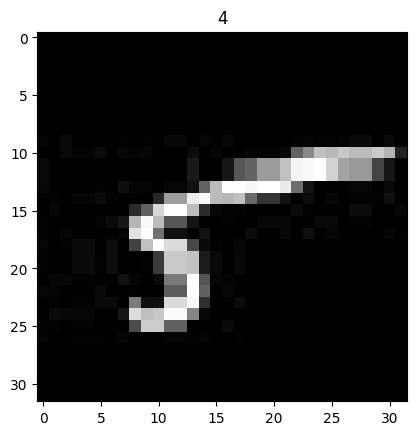

In [24]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(x_test[10])
plt.title(str(labels[np.argmax(pred[10])]))
print(str(labels[np.argmax(y_test[10])]))

In [25]:
y_test[10]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Note: Train the model for large epochs to get better accuracy